In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

In [ ]:
def test_postgres_connection():
    try:
        conn = psycopg2.connect(
            host=pg_host,
            database=pg_database,
            user=pg_user,
            password=pg_password,
            port=pg_port
        )
        conn.close()
        print("✅ Conexão bem-sucedida com psycopg2!")
        return True
    except Exception as e:
        print(f"❌ Falha na conexão: {e}")
        return False

# Execute o teste
test_postgres_connection()

✅ Conexão bem-sucedida com psycopg2!


True

In [5]:
engine = create_engine(
    f'postgresql://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_database}'
)

In [6]:
# ETAPA 1: Ler os dados do PostgreSQL
try:
    # Ler uma amostra dos dados (primeiras 1000 linhas para não sobrecarregar)
    query = f"SELECT * FROM {table_name} LIMIT 1000"
    df = pd.read_sql(query, engine)
    
    print("✅ Dados lidos com sucesso do PostgreSQL!")
    print(f"\nTotal de registros carregados: {len(df)}")
    
except Exception as e:
    print(f"❌ Erro ao ler dados do PostgreSQL: {e}")
    raise

✅ Dados lidos com sucesso do PostgreSQL!

Total de registros carregados: 1000


In [9]:
# ETAPA 2: Análise da Estrutura do Dataset
if not df.empty:
    print("\n🔍 ESTRUTURA DO DATASET:\n")



🔍 ESTRUTURA DO DATASET:



In [13]:
# 2.1. Visualização das primeiras linhas
print("📋 Primeiras linhas do dataset:")
display(df.head())

📋 Primeiras linhas do dataset:


,municipio,ano,tipo_da_forma_de_abastecimento,mes,parametro,data_da_coleta,resultado,__arquivo_origem,resultado_num,conformidade,tipo_analise
0,MILAGRES,2024,SAA,7,Turbidez (uT),2024-07-08,"0,61",dados_2024_2025_05_02.csv,0.61,CONFORME,Físico-Química
1,JAGUARIBARA,2024,SAA,10,Escherichia coli,2024-10-22,AUSENTE,dados_2024_2025_05_02.csv,NaN,CONFORME,Microbiológica
2,ITATIRA,2024,SAA,11,Cor Aparente (uH),2024-11-18,5,dados_2024_2025_05_02.csv,5.00,CONFORME,Físico-Química
3,ITATIRA,2024,SAA,11,Turbidez (uT),2024-11-18,"0,2",dados_2024_2025_05_02.csv,0.20,CONFORME,Físico-Química
4,SENADOR SA,2024,SAA,2,Turbidez (uT),2024-02-27,"1,0",dados_2024_2025_05_02.csv,1.00,CONFORME,Físico-Química


In [14]:
# 2.2. Informações sobre colunas e tipos
print("\n📝 Informações sobre colunas e tipos de dados:")
print(df.info())


📝 Informações sobre colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   municipio                       1000 non-null   object 
 1   ano                             1000 non-null   int64  
 2   tipo_da_forma_de_abastecimento  1000 non-null   object 
 3   mes                             1000 non-null   object 
 4   parametro                       1000 non-null   object 
 5   data_da_coleta                  1000 non-null   object 
 6   resultado                       1000 non-null   object 
 7   __arquivo_origem                1000 non-null   object 
 8   resultado_num                   637 non-null    float64
 9   conformidade                    1000 non-null   object 
 10  tipo_analise                    1000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 

In [15]:
# 2.3. Estatísticas descritivas
print("\n📊 Estatísticas descritivas das colunas numéricas:")
display(df.describe(include='all'))


📊 Estatísticas descritivas das colunas numéricas:


,municipio,ano,tipo_da_forma_de_abastecimento,mes,parametro,data_da_coleta,resultado,__arquivo_origem,resultado_num,conformidade,tipo_analise
count,1000,1000.0,1000,1000,1000,1000,1000,1000,637.000000,1000,1000
unique,177,NaN,1,12,8,168,203,1,NaN,3,3
top,FORTALEZA,NaN,SAA,5,Cloro residual livre (mg/L),2024-03-20,AUSENTE,dados_2024_2025_05_02.csv,NaN,CONFORME,Físico-Química
freq,17,NaN,1000,113,213,26,302,1000,NaN,857,636
mean,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,3.820078,NaN,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.064084,NaN,NaN
min,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN
50%,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,1.670000,NaN,NaN
75%,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [16]:
# 2.4. Valores únicos por coluna categórica
print("\n🌈 Valores únicos nas colunas categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False).head(10))
    if len(df[col].unique()) > 10:
        print(f"... (Total de valores únicos: {len(df[col].unique())})")


🌈 Valores únicos nas colunas categóricas:

municipio:
municipio
FORTALEZA    17
GRANJA       16
QUIXADA      13
ITAPIPOCA    13
SOBRAL       13
ARACOIABA    12
CAUCAIA      12
COREAU       12
IGUATU       12
GUAIUBA      11
Name: count, dtype: int64
... (Total de valores únicos: 177)

tipo_da_forma_de_abastecimento:
tipo_da_forma_de_abastecimento
SAA    1000
Name: count, dtype: int64

mes:
mes
5     113
3      98
2      94
6      89
4      88
1      87
7      83
9      78
10     76
11     67
Name: count, dtype: int64
... (Total de valores únicos: 12)

parametro:
parametro
Cloro residual livre (mg/L)        213
Turbidez (uT)                      198
Coliformes totais                  189
Escherichia coli                   174
Cor Aparente (uH)                  137
Fluoreto (mg/L)                     56
pH                                  32
Cloro residual combinado (mg/L)      1
Name: count, dtype: int64

data_da_coleta:
data_da_coleta
2024-03-20    26
2024-02-20    19
2024-05-08    18

In [17]:
# 2.5. Verificação de valores nulos
print("\n⚠️ Valores nulos por coluna:")
null_counts = df.isnull().sum()
display(null_counts[null_counts > 0])


⚠️ Valores nulos por coluna:


resultado_num    363
dtype: int64


📅 Distribuição temporal dos dados:


/tmp/ipykernel_42715/39095448.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temporal_dist = df.set_index('data_da_coleta').resample('M').size()


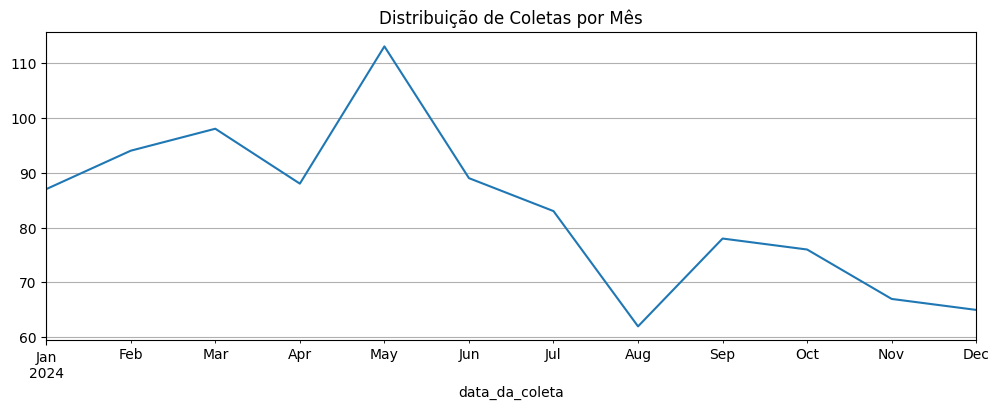

In [18]:
# 2.6. Análise da distribuição temporal (se houver coluna de data)
if 'data_da_coleta' in df.columns:
    print("\n📅 Distribuição temporal dos dados:")
    try:
        # Converter para datetime se necessário
        if not pd.api.types.is_datetime64_any_dtype(df['data_da_coleta']):
            df['data_da_coleta'] = pd.to_datetime(df['data_da_coleta'], errors='coerce')
            
            # Agrupar por mês/ano
            temporal_dist = df.set_index('data_da_coleta').resample('M').size()
            temporal_dist.plot(
                title='Distribuição de Coletas por Mês',
                figsize=(12, 4),
                grid=True
            )
    except Exception as e:
        print(f"Não foi possível analisar a distribuição temporal: {e}")

In [19]:
# 2.7. Análise da distribuição por município (exemplo)
if 'municipio' in df.columns:
    print("\n🏙️ Top 10 municípios com mais coletas:")
    display(df['municipio'].value_counts().head(10))


🏙️ Top 10 municípios com mais coletas:


municipio
FORTALEZA    17
GRANJA       16
QUIXADA      13
ITAPIPOCA    13
SOBRAL       13
ARACOIABA    12
CAUCAIA      12
COREAU       12
IGUATU       12
GUAIUBA      11
Name: count, dtype: int64

In [20]:
# 2.8. Análise da conformidade
if 'conformidade' in df.columns:
    print("\n✅❌ Distribuição de conformidade:")
    display(df['conformidade'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))
    
else:
    print("Nenhum dado foi carregado para análise.")


✅❌ Distribuição de conformidade:


conformidade
CONFORME        85.7%
NÃO CONFORME    14.2%
IGNORADO         0.1%
Name: proportion, dtype: object

In [23]:
# Análise de distribuição por tipo de análise
if 'tipo_analise' in df.columns and 'conformidade' in df.columns:
    print("\n🔬 Conformidade por tipo de análise:")
    display(pd.crosstab(df['tipo_analise'], df['conformidade'], normalize='index'))


🔬 Conformidade por tipo de análise:


conformidade,CONFORME,IGNORADO,NÃO CONFORME
tipo_analise,,,
Físico-Química,0.872642,0.0,0.127358
Microbiológica,0.831956,0.0,0.168044
Outros,0.000000,1.0,0.000000
